In [1]:
from sklearn.datasets import load_iris

C:\Users\manoj\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\manoj\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\manoj\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris=load_iris()

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
df=pd.DataFrame(np.c_[iris.data,iris.target],columns=['sl','sw','pl','pw','class'])

In [12]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [43]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

In [48]:
df['class']=df['class'].astype(np.int32)

In [46]:
df.loc[df['class']==0,'class']=2
df.loc[df['class']==2,'class']=0

In [47]:
df['class'].value_counts()

0.0    100
1.0     50
Name: class, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
tr,ts=train_test_split(df,test_size=0.3,random_state=42)

In [51]:
tr['class'].value_counts()

0    68
1    37
Name: class, dtype: int64

In [52]:
ts['class'].value_counts()

0    32
1    13
Name: class, dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf=LogisticRegression()

In [55]:
clf.fit(tr.iloc[:,:-1],tr.iloc[:,-1])

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
tr_pred=clf.predict(tr.iloc[:,:-1])
tr_act=tr.iloc[:,-1]

In [57]:
ts_pred=clf.predict(ts.iloc[:,:-1])
ts_act=ts.iloc[:,-1]

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,\
precision_recall_curve,roc_curve,roc_auc_score,confusion_matrix

In [58]:
accuracy_score(tr_pred,tr_act)

0.6666666666666666

In [59]:
accuracy_score(ts_pred,ts_act)

0.7555555555555555

In [63]:
print(confusion_matrix(tr_act,tr_pred))

[[60  8]
 [27 10]]


In [64]:
precision_score(tr_act,tr_pred)

0.5555555555555556

In [65]:
recall_score(tr_act,tr_pred)

0.2702702702702703

In [ ]:
tr.iloc[:,:-1],tr.iloc[:,-1]

In [109]:
dec_scr=clf.decision_function(ts.iloc[:,:-1])

In [69]:
clf.predict_proba(tr.iloc[:,:-1])

array([[0.43914449, 0.56085551],
       [0.49984291, 0.50015709],
       [0.64493381, 0.35506619],
       [0.58380998, 0.41619002],
       [0.82241028, 0.17758972],
       [0.64159627, 0.35840373],
       [0.43926503, 0.56073497],
       [0.70871966, 0.29128034],
       [0.84847072, 0.15152928],
       [0.31913269, 0.68086731],
       [0.48225409, 0.51774591],
       [0.8199641 , 0.1800359 ],
       [0.8720654 , 0.1279346 ],
       [0.90199746, 0.09800254],
       [0.36371137, 0.63628863],
       [0.56151948, 0.43848052],
       [0.81929591, 0.18070409],
       [0.71088351, 0.28911649],
       [0.83414267, 0.16585733],
       [0.57773   , 0.42227   ],
       [0.82124688, 0.17875312],
       [0.6528382 , 0.3471618 ],
       [0.7398753 , 0.2601247 ],
       [0.8157347 , 0.1842653 ],
       [0.5750482 , 0.4249518 ],
       [0.59820999, 0.40179001],
       [0.93336355, 0.06663645],
       [0.71225548, 0.28774452],
       [0.62673855, 0.37326145],
       [0.28493081, 0.71506919],
       [0.

In [110]:
pr,rc,th=precision_recall_curve(ts.iloc[:,-1],dec_scr)

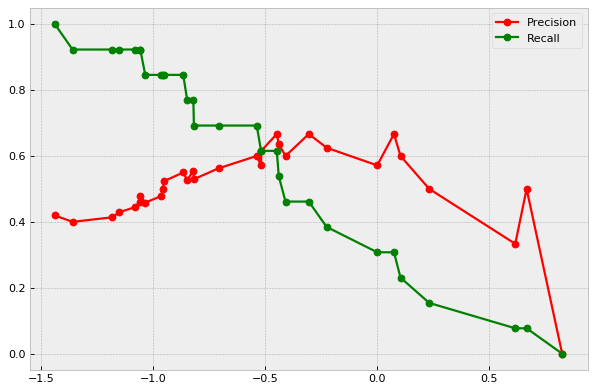

In [111]:
plt.figure(figsize=(9,6),dpi=80)
plt.style.use('bmh')
plt.plot(th,pr[:-1],'r-o',label='Precision')
plt.plot(th,rc[:-1],'g-o',label='Recall')
plt.legend()

In [91]:
tr_pred_new=np.array(dec_scr>=0.75,dtype=np.int32)

In [92]:
accuracy_score(tr_act,tr_pred_new)

0.638095238095238

In [93]:
precision_score(tr_act,tr_pred_new)

0.3333333333333333

In [94]:
recall_score(tr_act,tr_pred_new)

0.02702702702702703

In [95]:
#true positive rate vs false postive rate

No handles with labels found to put in legend.


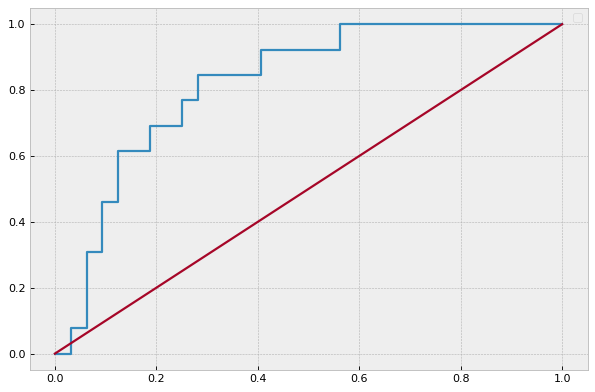

In [112]:
fpr,tpr,th=roc_curve(ts.iloc[:,-1],dec_scr)

plt.figure(figsize=(9,6),dpi=80)
plt.style.use('bmh')
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.legend()

In [103]:
from sklearn.ensemble import RandomForestClassifier
fclf=RandomForestClassifier()
fclf.fit(tr.iloc[:,:-1],tr.iloc[:,-1])

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# fclf.predict_proba(tr.iloc[:,:-1])[]

In [106]:
fclf.predict_proba(tr.iloc[:,:-1])[:,1]

array([1. , 0.2, 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. , 0. , 0. ,
       0. , 0.7, 0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 1. , 0. ,
       0. , 0. , 0. , 0.8, 1. , 0. , 1. , 0. , 0.9, 0. , 0. , 0. , 1. ,
       0.7, 0. , 0. , 0. , 0. , 0.5, 1. , 0. , 0.5, 0. , 0. , 1. , 0. ,
       0. , 0.4, 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 1. ,
       1. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 1. ,
       1. , 0. , 1. , 0. , 0. , 0. , 0.9, 0. , 0.2, 0. , 0. , 0. , 0.9,
       0. , 0. , 1. , 0. , 1. , 1. , 0. , 0.1, 0. , 1. , 0.3, 0. , 1. ,
       0. ])

No handles with labels found to put in legend.


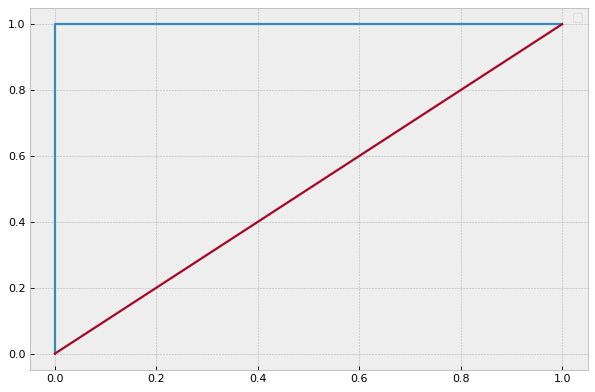

In [113]:
fpr,tpr,th=roc_curve(ts.iloc[:,-1],fclf.predict_proba(ts.iloc[:,:-1])[:,1])

plt.figure(figsize=(9,6),dpi=80)
plt.style.use('bmh')
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.legend()